# Практика 1. Базовые подходы к решению NLP-задач 

# 1. Постановка задачи

Рассмотрим некую искусственную задачу - определить, какие из твитов имеют отношение к событию-катастрофе в противоположность тем твитам, которые относятся к нерелевантным темам (например, фильмам).

**Зачем это может быть интересно?** Например, для журналистов, чтобы отслеживать информацию о чрезвычайных проишествиях. Можно было бы настроить эксклюзивное уведомление журналиста или оедактора о чрезвычайных ситуациях, требующих неотложного внимания. При этом были бы проигнорированы твиты, содержащие шутки, обзоры на фильмов-катастроф или чего-либо, не имеющего отношение к катастрофам.

# 2. Собор данных / Источники данных

Для целей нашей искусственной задачи мы не будем писать модуль сбора данных, а просто воспользуемся уже существующим набором данных. К сожалению, большинство содержательных наборов данных англоязычные. Но принципиальной разницы в подходах для разных языков нет (хотя есть содержательные отличия, конечно).

Мы будем использовать датасет «Катастрофы в социальных медиа», любезно предоставленный компанией [CrowdFlower](https://www.figure-eight.com/data-for-everyone/). Есть интересные источники данных и на русском языке, но с ними мы поработем уже отдельно.

Авторы рассмотрели свыше 10 000 твитов, которые были отобраны при помощи различных поисковых запросов вроде «в огне», «карантин» и «столпотворение». Затем они пометили, имеет ли твит отношение к событию-катастрофе (в отличие от шуток с использованием этих слов, обзоров на фильмы или чего-либо, не имеющего отношение к катастрофам).

    wget https://d1p17r2m4rzlbo.cloudfront.net/wp-content/uploads/2016/03/socialmedia-disaster-tweets-DFE.csv

# 3. Анализ данных

> Правило номер один: «Ваша модель сможет стать лишь настолько хороша, насколько хороши ваши данные»

Одним из ключевых навыков профессионального Data Scientist является знание о том, что должно быть следующим шагом — работа над моделью или над данными. Как показывает практика, сначала лучше взглянуть на сами данные, а только потом произвести их очистку. Чистый датасет позволит модели выучить значимые признаки и не переобучиться на нерелевантном шуме.

### Сохраняем файл в "правильный" формат для python

In [1]:
import codecs

In [2]:
input_file = codecs.open("socialmedia-disaster-tweets-DFE.csv", "r",encoding='utf-8', errors='replace')
output_file = open("socialmedia_clean.csv", "w")

def sanitize_characters(raw, clean):    
    for line in input_file:
        out = line
        output_file.write(line)
sanitize_characters(input_file, output_file)

### Изучаем данные

Для работы с данными будем использовать библиотеку [pandas](https://pandas.pydata.org/).

pandas — программная библиотека на языке Python для обработки и анализа данных. Работа pandas с данными строится поверх библиотеки NumPy, являющейся инструментом более низкого уровня. Предоставляет специальные структуры данных и операции для манипулирования числовыми таблицами и временны́ми рядами. Название библиотеки происходит от эконометрического термина «панельные данные» (англ. panel data), используемого для описания многомерных структурированных наборов информации

### Какое количество записей у нас есть?

In [3]:
import pandas as pd

twits = pd.read_csv("socialmedia_clean.csv")
twits.count()

_unit_id                 10869
_golden                  10869
_unit_state              10869
_trusted_judgments       10869
_last_judgment_at        10792
choose_one               10869
choose_one:confidence    10869
choose_one_gold             80
keyword                  10789
location                  7238
text                     10869
tweetid                  10869
userid                   10789
dtype: int64

### Выведем для примера некоторый диапазон

In [4]:
twits[100:108]

_unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
100  778244916    False   finalized                   5     8/26/15 16:00   
101  778244917    False   finalized                   5     8/26/15 16:00   
102  778244918    False   finalized                   5     8/26/15 17:19   
103  778244919    False   finalized                   5      8/31/15 6:59   
104  778244920    False   finalized                   5     8/28/15 18:20   
105  778244921    False   finalized                   6     8/26/15 16:25   
106  778244922    False   finalized                   5     8/26/15 17:19   
107  778244923    False   finalized                   5     8/28/15 18:23   

       choose_one  choose_one:confidence choose_one_gold   keyword  \
100  Not Relevant                 1.0000             NaN  accident   
101  Not Relevant                 1.0000             NaN  accident   
102  Not Relevant                 0.5994             NaN  accident   
103  Not Relevant                 1.0000             NaN  accident   
104      Relevant                 1.0000             NaN  accident   
105      Relevant                 0.6672             NaN  accident   
106  Not Relevant                 1.0000             NaN  accident   
107      Relevant                 1.0000             NaN  accident   

                   location  \
100                      UK   
101                     NaN   
102           St. Louis, MO   
103                     NaN   
104  Walker County, Alabama   
105               Australia   
106                     USA   
107          North Carolina   

                                                  text       tweetid  \
100  http://t.co/GKYe6gjTk5 Had a #personalinjury a...  6.293520e+17   
101  Just got to love burning your self on a damn c...  6.293550e+17   
102  #stlouis #caraccidentlawyer Speeding Among Top...  6.293540e+17   
103                    I hate badging shit in accident  6.293530e+17   
104  Reported motor vehicle accident in Curry on He...  6.293530e+17   
105                BigRigRadio Live Accident Awareness  6.293530e+17   
106  #3: Car Recorder ZeroEdge� Dual-lens Car Camer...  6.293540e+17   
107  I-77 Mile Marker 31 South Mooresville  Iredell...  6.293520e+17   

           userid  
100  2.485549e+09  
101  3.116128e+09  
102  1.257428e+09  
103  1.188621e+08  
104  2.846758e+09  
105  4.776091e+07  
106  2.950518e+08  
107  6.761926e+07

### Посмотрим какие есть классы

In [5]:
twits[['choose_one']].describe()

choose_one
count          10869
unique             3
top     Not Relevant
freq            6187

In [6]:
choose_one = twits.groupby('choose_one').nunique()
choose_one[['_unit_id']]

_unit_id
choose_one            
Can't Decide        16
Not Relevant      6187
Relevant          4666

### Пример релеватных твитов

In [7]:
relevant = twits.loc[twits['choose_one'] == "Relevant"]
relevant[['text']][:5]

text
0                 Just happened a terrible car crash
1  Our Deeds are the Reason of this #earthquake M...
2  Heard about #earthquake is different cities, s...
3  there is a forest fire at spot pond, geese are...
4             Forest fire near La Ronge Sask. Canada

### Пример нерелевантных твитов

In [8]:
not_relevant = twits.loc[twits['choose_one'] == "Not Relevant"]
not_relevant[['text']][:5]

text
21  They'd probably still show more life than Arse...
22                                  Hey! How are you?
23                                     What's up man?
24                                      I love fruits
25                                   Summer is lovely

### Пример неопределенных твитов

In [9]:
cant_decide = twits.loc[twits['choose_one'] == "Can't Decide"]
cant_decide[['text']][:5]

text
279     Why is there an ambulance right outside my work
1628                    @MisfitRarity misfit got bombed
1763  @RockBottomRadFM Is one of the challenges on T...
1964  ? High Skies - Burning Buildings ? http://t.co...
1970  What if we used drones to help firefighters le...

# 4. Очистка данных (лексический анализ)

Чеклист, который используется при очистке данных:

* Удалить все нерелевантные символы (например, любые символы, не относящиеся к цифро-буквенным).
* Токенизировать текст, разделив его на индивидуальные слова.
* Удалить нерелевантные слова — например, упоминания в Twitter или URL-ы.
* Перевести все символы в нижний регистр для того, чтобы слова «привет», «Привет» и «ПРИВЕТ» считались одним и тем же словом.
* Рассмотрите возможность совмещения слов, написанных с ошибками, или имеющих альтернативное написание (например, «круто»/«круть»/ «круууто»)
* Рассмотрите возможность проведения лемматизации, т. е. сведения различных форм одного слова к словарной форме (например, «машина» вместо «машиной», «на машине», «машинах» и пр.)

После того, как мы пройдемся по этим шагам и выполним проверку на дополнительные ошибки, мы можем начинать использовать чистые, помеченные данные для обучения моделей.

### Очистим от нерелевантых символов

In [10]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    return df

twits = standardize_text(twits, "text")
twits[['_unit_id','text','choose_one']][100:108]

_unit_id                                               text  \
100  778244916   had a  personalinjury accident this summer? r...   
101  778244917  just got to love burning your self on a damn c...   
102  778244918   stlouis  caraccidentlawyer speeding among top...   
103  778244919                    i hate badging shit in accident   
104  778244920  reported motor vehicle accident in curry on he...   
105  778244921                bigrigradio live accident awareness   
106  778244922   3  car recorder zeroedge  dual lens car camer...   
107  778244923  i 77 mile marker 31 south mooresville  iredell...   

       choose_one  
100  Not Relevant  
101  Not Relevant  
102  Not Relevant  
103  Not Relevant  
104      Relevant  
105      Relevant  
106  Not Relevant  
107      Relevant

### Токенизируем текст

Для задачи токенизации мы будем использовать [Natural Language Toolkit](http://www.nltk.org/) - пакет библиотек и программ для символьной и статистической обработки естественного языка, написанных на языке программирования Python. Содержит графические представления и примеры данных. Сопровождается обширной документацией, включая книгу с объяснением основных концепций, стоящих за теми задачами обработки естественного языка, которые можно выполнять с помощью данного пакета

In [11]:
import nltk
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
twits["tokens"] = twits["text"].apply(tokenizer.tokenize)
twits[['_unit_id','text','choose_one','tokens']][100:108]

_unit_id                                               text  \
100  778244916   had a  personalinjury accident this summer? r...   
101  778244917  just got to love burning your self on a damn c...   
102  778244918   stlouis  caraccidentlawyer speeding among top...   
103  778244919                    i hate badging shit in accident   
104  778244920  reported motor vehicle accident in curry on he...   
105  778244921                bigrigradio live accident awareness   
106  778244922   3  car recorder zeroedge  dual lens car camer...   
107  778244923  i 77 mile marker 31 south mooresville  iredell...   

       choose_one                                             tokens  
100  Not Relevant  [had, a, personalinjury, accident, this, summe...  
101  Not Relevant  [just, got, to, love, burning, your, self, on,...  
102  Not Relevant  [stlouis, caraccidentlawyer, speeding, among, ...  
103  Not Relevant             [i, hate, badging, shit, in, accident]  
104      Relevant  [reported, motor, vehicle, accident, in, curry...  
105      Relevant           [bigrigradio, live, accident, awareness]  
106  Not Relevant  [3, car, recorder, zeroedge, dual, lens, car, ...  
107      Relevant  [i, 77, mile, marker, 31, south, mooresville, ...

### Сохраним в файл

In [12]:
twits.to_csv("clean_data.csv")

### Распределение слов в текстах

In [13]:
all_words = [word for tokens in twits["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in twits["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

154618 words total, with a vocabulary size of 18096
Max sentence length is 34


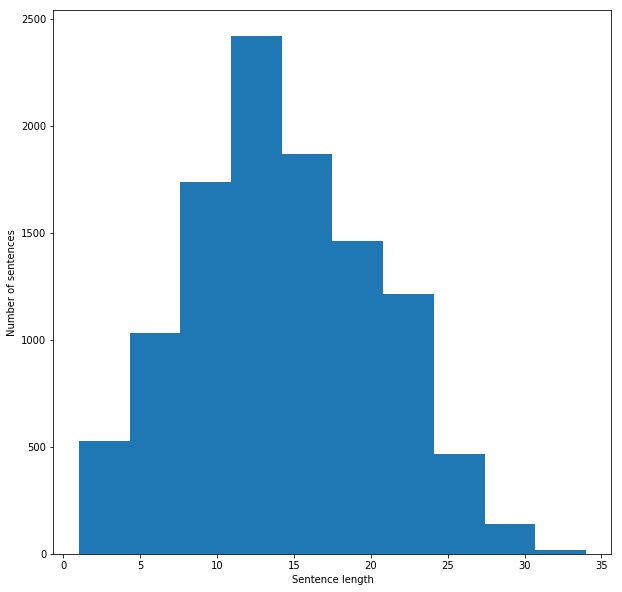

In [15]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

# 5. Выбор представления

В качестве ввода модели машинного обучения принимают числовые значения. Наш датасет представляет собой список предложений, поэтому для того, чтобы наш алгоритм мог извлечь паттерны из данных, вначале мы должны найти способ представить его таким образом, чтобы наш алгоритм мог его понять.

У нас в наборе две текстовых размерности:
* Имя класса
* Текст Твита

### Добавим ID класса

In [16]:
def get_id_class(text_label):
    if text_label == "Relevant":
        return 1
    if text_label == "Not Relevant":
        return 0
    if text_label == "Can't Decide":
        return 2

twits["_id_class"] = twits["choose_one"].apply(get_id_class)
twits[['_unit_id','text','choose_one','_id_class']][100:108]

_unit_id                                               text  \
100  778244916   had a  personalinjury accident this summer? r...   
101  778244917  just got to love burning your self on a damn c...   
102  778244918   stlouis  caraccidentlawyer speeding among top...   
103  778244919                    i hate badging shit in accident   
104  778244920  reported motor vehicle accident in curry on he...   
105  778244921                bigrigradio live accident awareness   
106  778244922   3  car recorder zeroedge  dual lens car camer...   
107  778244923  i 77 mile marker 31 south mooresville  iredell...   

       choose_one  _id_class  
100  Not Relevant          0  
101  Not Relevant          0  
102  Not Relevant          0  
103  Not Relevant          0  
104      Relevant          1  
105      Relevant          1  
106  Not Relevant          0  
107      Relevant          1

### Bag of Words Counts


Для получения векторного представления текстов мы будем использовать библиотеку [Scikit-learn](https://scikit-learn.org/stable/) - бесплатная библиотека машинного обучения для языка программирования Python. В ней реализованы некоторые алгоритмы векторизации, которые мы будем использовать

Одна из первых концепций обработки естественных языков Bag-of-Words — это статистический анализ, анализирующий количественное вхождение слов в документах. Не смотря на то, что подход сформирован весьма давно, он отлично подходит для первичной обработки текстов и быстрого прототипирования.

Модуль CountVectorizer в sklearn как раз подзволяет сконвертировать набор текстов в матрицу токенов, находящихся в тексте. Также имеется много полезных настроек, например можно задать минимальное количество необходимое для появления токена в матрице и даже получить статистику по n-граммам. Следует учитывать, что CountVectorizer по умолчанию сам производит токенизацию и выкидывает слова с длиной меньшей чем два.

#### Разбиваем множество твитов на тестовую и обучающие выборки

In [17]:
from sklearn.model_selection import train_test_split

corpus = twits["text"].tolist()
classes = twits["_id_class"].tolist()

X_train, X_test, y_train, y_test = train_test_split(corpus, 
                                                    classes, 
                                                    test_size=0.2,
                                                    random_state=40)

#### Формируем два векторных представления - для тестовой выборки и для обучающей выборки

* X_train_emb - векторное представление твитов в обучающей выборке
* X_test_emb  - векторное представление твитов в тестовой выборке

In [18]:
# Алгоритмы векторного предаставления слов (CountVectorizer - "мешок слов", TfidfVectorizer - векторизация по метрике tf-idf)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = CountVectorizer()
X_train_emb = vectorizer.fit_transform(X_train)
X_test_emb = vectorizer.transform(X_test)

In [19]:
vocab = vectorizer.get_feature_names()
print("Размер словаря: ", len(vocab))
print("Фрагмен словаря: ")
vectorizer.get_feature_names()[10000:10010]

Размер словаря:  16014
Фрагмен словаря: 


['occupies',
 'occur',
 'occurred',
 'occurrence',
 'occurs',
 'ocd',
 'ocean',
 'oceans',
 'ocnj',
 'oct']

В словаре содержится около 16 000 слов. Это означает, что каждое предложение будет отражено вектором длиной 16 000. Этот вектор будет содержать преимущественно нули, поскольку каждое предложение содержит лишь малое подмножество из нашего словаря.

#### Визуализируем векторное представление

Для того, чтобы выяснить, захватывают ли наши векторные представления (embeddings), релевантную нашей задаче информацию (например, имеют ли твиты отношение к катастрофам или нет), стоит попробовать визуализировать их и посмотреть, насколько хорошо разделены эти классы. Поскольку словари обычно являются очень большими и визуализация данных на 16 000 измерений невозможна, подходы вроде метода главных компонент (PCA) помогают спроецировать данные на два измерения.

Для этих целей мы используем TruncatedSVD из библиотеки sklearn и спроецируем нашу матрицу с размерностью в 16 000 измерений в векторное представлени из двух изменений

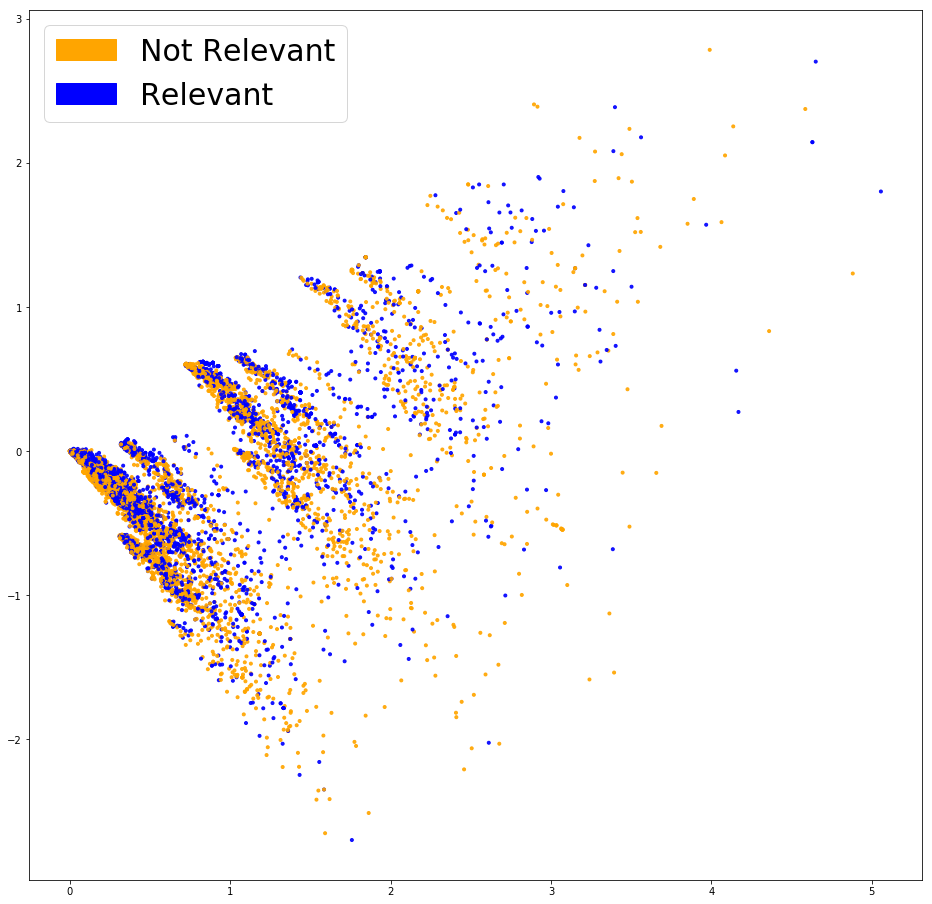

In [20]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches

def pca(test_data):
    lsa = TruncatedSVD(n_components=2)
    lsa.fit(test_data)
    lsa_scores = lsa.transform(test_data)
    return lsa_scores

def plot_LSA(test_data, test_labels, plot=True):
        lsa_scores = pca(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=9, alpha=.9, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='orange', label='Not Relevant')
            green_patch = mpatches.Patch(color='blue', label='Relevant')
            plt.legend(handles=[red_patch, green_patch], prop={'size': 30})


fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_emb, y_train)
plt.show()

# 6. Обучим модель разбиения на классы

#### Построим модель

Для нашего первого примеры мы будем использовать самый примитивный алгоритм [Логистической регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [21]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=30.0, 
                         class_weight='balanced', 
                         solver='newton-cg', 
                         multi_class='multinomial', 
                         n_jobs=-1, 
                         random_state=40)
clf.fit(X_train_emb, y_train)

LogisticRegression(C=30.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=-1, penalty='l2',
          random_state=40, solver='newton-cg', tol=0.0001, verbose=0,
          warm_start=False)

#### Проверим построенную логистическую регрессию на наших тестовых данных

In [24]:
def get_class(_id):
    if _id == 0:
        return "Not Relevant"
    if _id == 1:
        return "Relevant"
    if _id == 2:
        return "Can't Decide"
    
twit = corpus[106:107]
twit_emb = vectorizer.transform(twit)
classes = clf.predict(twit_emb)
print("[", twit[0], "]" )
print("is ", get_class(classes[0]) )

[  3  car recorder zeroedge  dual lens car camera vehicle traffic driving history accident camcorder  large re     ]
is  Not Relevant


In [25]:
y_predicted_counts = clf.predict(X_test_emb)

# 7. Оценим качество построенной модели

### Матрица ошибок

Первый шаг — это понять, какие типы ошибок совершает наша модель, и с какими видами ошибок нам в дальнейшем хотелось бы встречаться реже всего. Перед переходом к самим метрикам необходимо ввести важную концепцию для описания этих метрик в терминах ошибок классификации — confusion matrix (матрица ошибок). Такая матрица показывает сколько объектов одного класса были распознаны как объекты другого класса.

Матрица ошибок показывает два типа ошибок:
* **ошибки первого рода**. Такие ошибки называют **ложной тревогой, ложным срабатыванием или ложноположительным срабатыванием**. Если, например, анализ крови показал наличие заболевания, хотя на самом деле человек здоров, или металлодетектор выдал сигнал тревоги, сработав на металлическую пряжку ремня, то принятая гипотеза не верна, а следовательно совершена ошибка первого рода. Слово «ложноположительный» в данном случае не имеет отношения к желательности или нежелательности самого события
* **ошибки второго рода**. Такие ошибки называют **пропуском события или ложноотрицательным срабатыванием**. Человек болен, но анализ крови этого не показал, или у пассажира имеется холодное оружие, но рамка металлодетектора его не обнаружила

![Структура матрицы ошибок](Screenshot_2.png "Структура матрицы ошибок")

В случае нашего примера, ложно-положительные результаты классифицируют нерелевантный твит в качестве катастрофы, ложно-отрицательные — классифицируют катастрофу как нерелевантный твит. Если нашим приоритетом является реакция на каждое потенциальное событие, то мы захотим снизить наши ложно-отрицательные срабатывания.

In [26]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('Истинные классы', fontsize=30)
    plt.xlabel('Предсказанные классы', fontsize=30)

    return plt

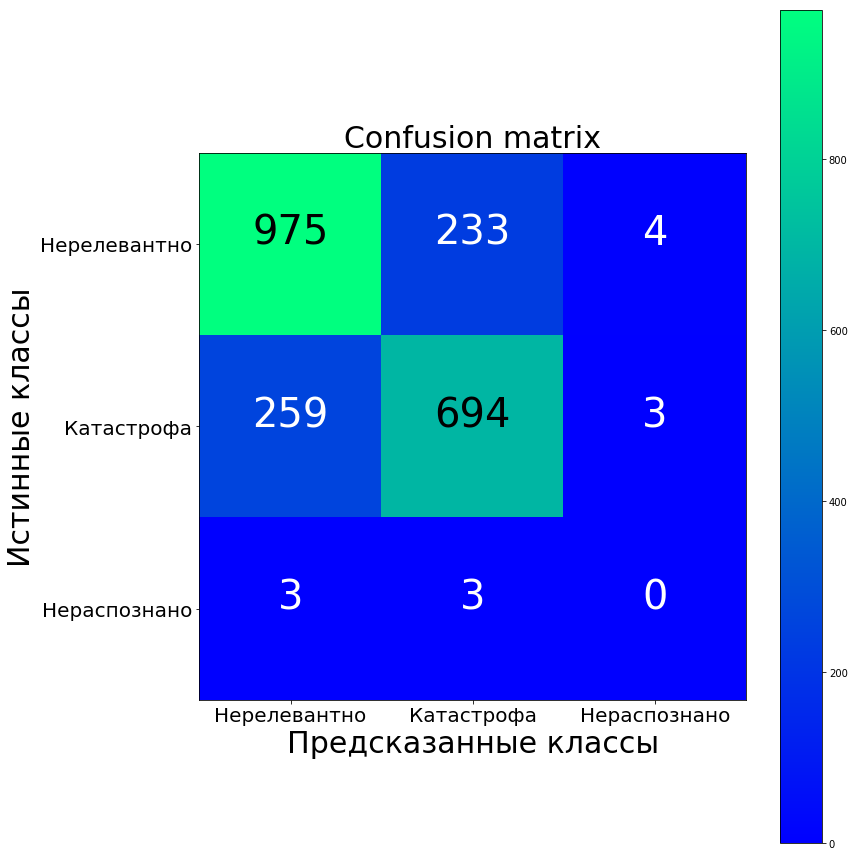

[[975 233   4]
 [259 694   3]
 [  3   3   0]]


In [27]:
cm = confusion_matrix(y_test, y_predicted_counts)
fig = plt.figure(figsize=(12, 12))
plot = plot_confusion_matrix(cm, classes=['Нерелевантно','Катастрофа','Нераспознано'], normalize=False, title='Confusion matrix')
plt.show()
print(cm)

Наш классификатор создает больше ложно-отрицательных, чем ложно-положительных результатов (пропорционально). Другими словами, самая частая ошибка нашей модели состоит в неточной классификации катастроф как нерелевантных.

### Метрики

[Метрики в задачах машинного обучения](https://habr.com/ru/company/ods/blog/328372/)

#### Accuracy

Интуитивно понятной, очевидной и почти неиспользуемой метрикой является accuracy — доля правильных ответов алгоритма:

$\large accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

In [28]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predicted_counts)
print("accuracy = %.3f" % (accuracy))

accuracy = 0.768


#### Precision 

Precision можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными

$\large precision = \frac{TP}{TP + FP}$

In [29]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_predicted_counts, pos_label=None,average='weighted')
print("precision = %.3f" % (precision))

precision = 0.768


#### Recall

Recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм

$\large recall = \frac{TP}{TP + FN}$

In [30]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_predicted_counts, pos_label=None,average='weighted')
print("recall = %.3f" % (recall))

recall = 0.768


#### F-мера

Существует несколько различных способов объединить precision и recall в агрегированный критерий качества. F-мера (в общем случае $\ F_\beta$) — среднее гармоническое precision и recall:

$\large \ F_\beta = (1 + \beta^2) \cdot \frac{precision \cdot recall}{(\beta^2 \cdot precision) + recall}$

$\beta$ в данном случае определяет вес точности в метрике, и при $\beta = 1$ это среднее гармоническое (с множителем 2, чтобы в случае precision = 1 и recall = 1 иметь $\ F_1 = 1$)

In [33]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_predicted_counts, pos_label=None, average='weighted')
print("f1 = %.3f" % (f1))

f1 = 0.768


In [34]:
from sklearn.metrics import classification_report
target_names = ['Нерелеватные', 'Катастрофы', 'Нераспознаны']
print(classification_report(y_test, y_predicted_counts, target_names=target_names))

              precision    recall  f1-score   support

Нерелеватные       0.79      0.80      0.80      1212
  Катастрофы       0.75      0.73      0.74       956
Нераспознаны       0.00      0.00      0.00         6

   micro avg       0.77      0.77      0.77      2174
   macro avg       0.51      0.51      0.51      2174
weighted avg       0.77      0.77      0.77      2174



Рекоммендации по выбору метрик:

* В случае многоклассовой классификации нужно внимательно следить за метриками каждого из классов и следовать логике решения задачи, а не оптимизации метрики
* В случае неравных классов нужно подбирать баланс классов для обучения и метрику, которая будет корректно отражать качество классификации
* Выбор метрики нужно делать с фокусом на предметную область, предварительно обрабатывая данные и, возможно, сегментируя (как в случае с делением на богатых и бедных клиентов)